<h2><font color="#004D7F" size=6>Módulo 3. Procesamiento de datos</font></h2>



<h1><font color="#004D7F" size=5>2. Transformación de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Los datos en bruto, sin analizar de antemano, muy difícilmente nos va a dar precisiones robustas ya que, entre otros aspectos, muchos de ellos requieren los datos en una forma específica, por lo que deberemos realizar una transformación del conjunto de datos. Por otro lado, otros algoritmos pueden funcionar mejor si los datos se preparan de una manera específica, por ejemplo, los de tipo árbol con atributos característica de tipo nominal. Por tanto, es de vital importancia realizar un preprocesamiento a nuestro datos como parte fundamental de realizar un proyecto de machine learning.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías y CSV</font>

Para esta práctica vamos a cargar el conjunto de datos de Pima Indian Diabetes y trabajar diferentes tipos de transformaciones de datos. Así mismo, en algunas de ellas vamos a trabajar otros conjuntos de datos para ver un mejor impacto en su transformación.

Por otro lado, en cuanto a las librerías, vamos a ver llamarlas según cada transformación. Tenga en cuenta que estas trasnformaciónes vamos a trabajarlas con la librería **Scikit-learn**.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = "data/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names=names) # datos almacenados
array = data.values # array con datos almacenados

# separo el array en inputs(características) y outputs(clase)
X = array[:,0:8] # todas las filas y desde la columna 0 hasta la 8 
Y = array[:,8] # todas las filas pero solo de la columna con índice 8 (9)(clase)

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
## <font color="#004D7F"> 2. Transformaciones</font>

El método de ajuste y transformación múltiple es el enfoque preferido. Llama a la función `fit()` para preparar los parámetros de la transformación una vez en sus datos. Luego, puede usar la función `transform()` en los mismos datos para prepararlos para el modelado y nuevamente en el conjunto de datos de prueba o validación o los nuevos datos que puede ver en el futuro. El ajuste y transformación combinados es una conveniencia que puede usar para tareas únicas. Esto puede ser útil si está interesado en trazar o resumir los datos transformados y se utilizará la función `fit_transform()`. Puede revisar la API [**sklearn.preprocessing**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). Como puede verse existe una gran cantidad de funciones que podemos aplicar en esta fase de preprocesamiento según la necesidad de nuestros datos.

Es importante ver como quedan los datos antes y después de transformarlos. En el siguiente código puede ver como quedan los datos originales y comparlos con cada transformación.

C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_3972\3812674864.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["preg"], ax=axes[0, 0])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_3972\3812674864.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function w

<Axes: xlabel='age', ylabel='Density'>

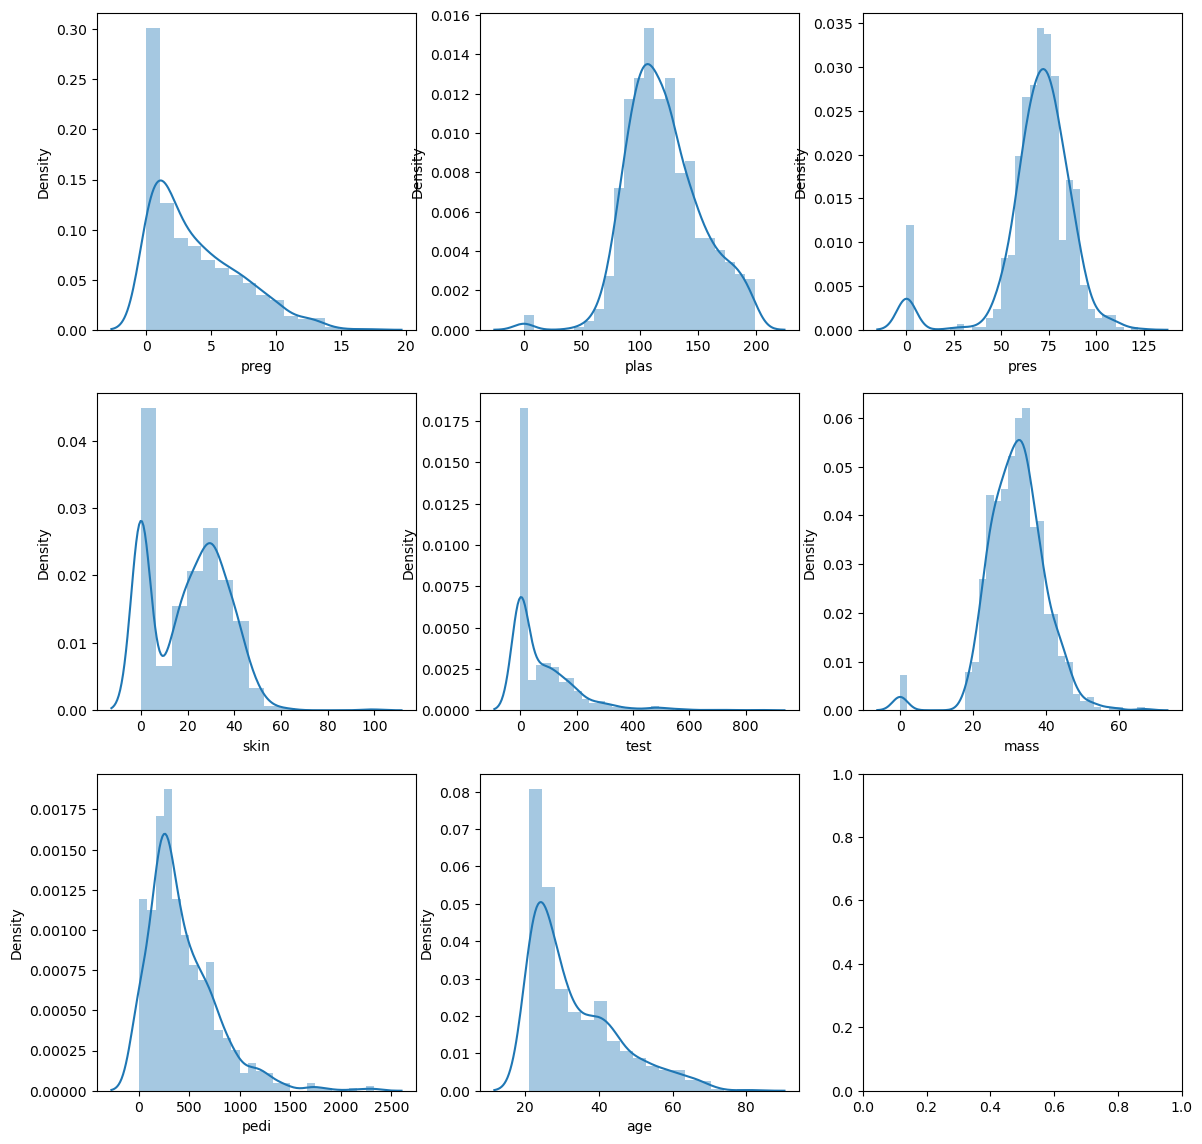

In [4]:
%matplotlib inline
# Univariate Histograms (antes del proceso de transformación de datos)
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(data["preg"], ax=axes[0, 0])
sns.distplot(data["plas"], ax=axes[0, 1])
sns.distplot(data["pres"], ax=axes[0, 2])
sns.distplot(data["skin"], ax=axes[1, 0])
sns.distplot(data["test"], ax=axes[1, 1])
sns.distplot(data["mass"], ax=axes[1, 2])
sns.distplot(data["pedi"], ax=axes[2, 0])
sns.distplot(data["age"], ax=axes[2, 1])
#sns.distplot(data["class"], ax=axes[2, 2])

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Escalamiento</font>

Esta transformación es útil para los algoritmos de optimización utilizados en el núcleo de los algoritmos de aprendizaje automático como Gradiente Descendiente. También es útil para algoritmos que ponderan entradas como Regression y Neural Networks y algoritmos que usan medidas de distancia como _k_-Nearest Neighbours. Puede reescalar sus datos usando la clase [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). 

Después de reescalar puede ver que todos los valores están en el rango $[0,1]$,

In [3]:
# Reescalamos datos (entre 0 y 1) 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Objeto de escalación
rescaledX = scaler.fit_transform(X) # Objeto de transfromación. Reescalamos solo las características, no la clase
np.set_printoptions(precision=3) # ponemos para que nos muestre un máximo de 3 decimales
print(names)
print(rescaledX[0:5,:]) # imprimo todas las columnas de características reescaladas de la primeras 5 filas 

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.353 0.744 0.59  0.354 0.    0.501 0.269 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.151 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.289 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.072 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.982 0.2  ]]


In [28]:
# Convertimos el Numpy Array a dataframe
df_rescaled = pd.DataFrame(rescaledX, columns=names[0:8]) # transformo en df las características reescaladas
df_rescaled['class']= Y # agrego la variable clase
df_rescaled

,preg,plas,pres,skin,test,mass,pedi,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.584149,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.226986,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.716400,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.767743,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.465654,-0.020496,1.0
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.755987,2.532136,0.0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-1.257539,-0.531023,0.0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.538509,-0.275760,0.0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.232864,1.170732,1.0


C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_3972\4026926966.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rescaled["preg"], ax=axes[0, 0])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_3972\4026926966.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fun

<Axes: xlabel='age', ylabel='Density'>

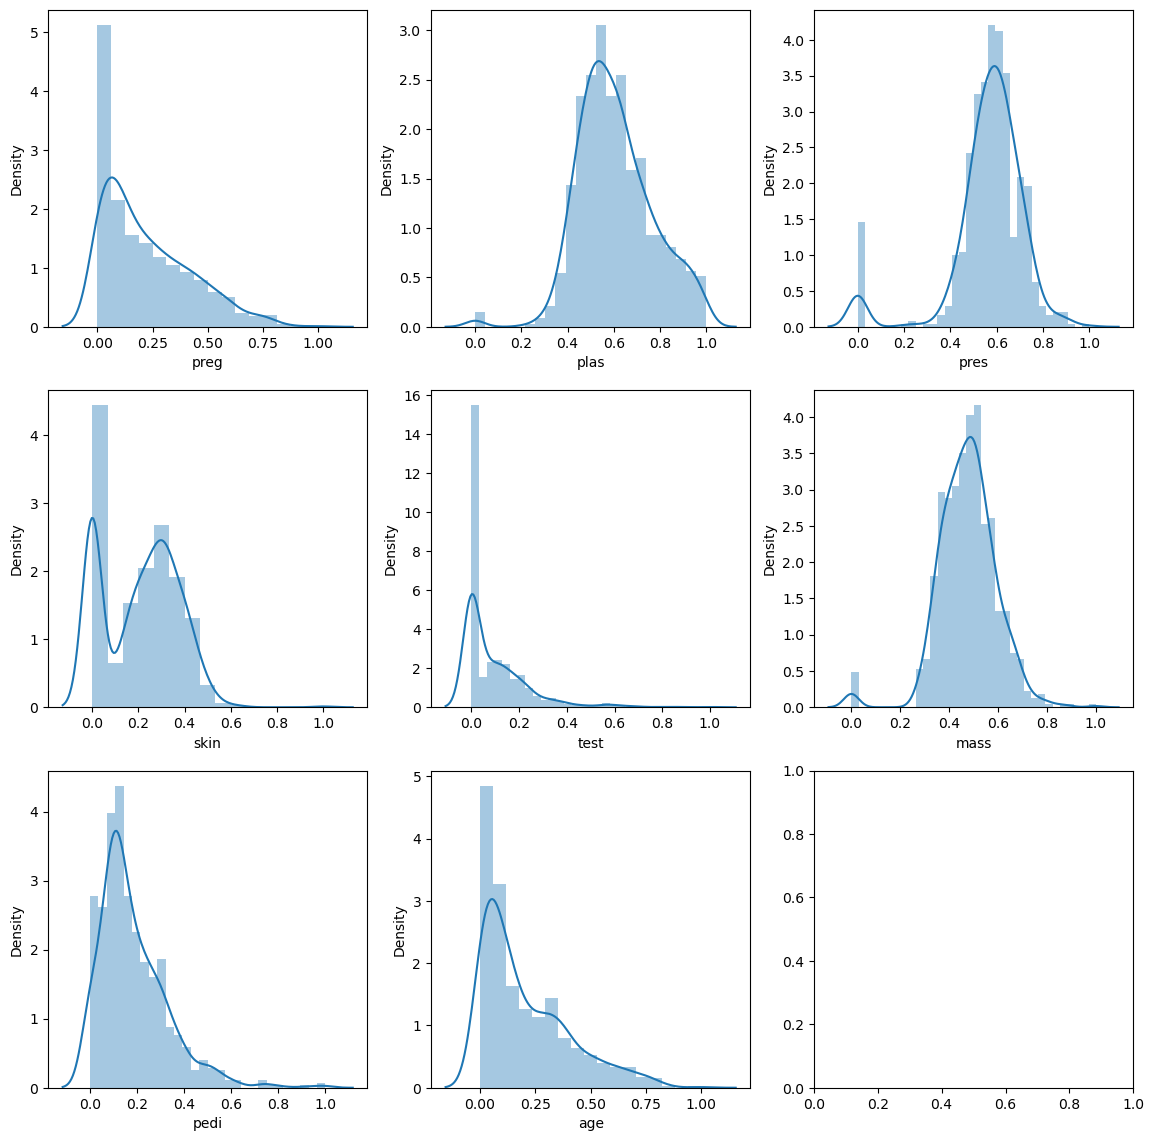

In [23]:
# Vemos la transformación gráfica
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(df_rescaled["preg"], ax=axes[0, 0])
sns.distplot(df_rescaled["plas"], ax=axes[0, 1])
sns.distplot(df_rescaled["pres"], ax=axes[0, 2])
sns.distplot(df_rescaled["skin"], ax=axes[1, 0])
sns.distplot(df_rescaled["test"], ax=axes[1, 1])
sns.distplot(df_rescaled["mass"], ax=axes[1, 2])
sns.distplot(df_rescaled["pedi"], ax=axes[2, 0])
sns.distplot(df_rescaled["age"], ax=axes[2, 1])

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Estandarización</font>

Es más adecuada para técnicas que asumen una distribución gaussiana en las variables de entrada y funcionan mejor con datos reescalados, como Linear Regression, Logistic Regression y Linear Discriminant Analysis. Puede estandarizar datos utilizando la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Los valores para cada atributo ahora tienen un valor medio de $0$ y una desviación estándar de $1$

In [4]:
# Estandarizamos datos (0 media, 1 desv estándar)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X) # Objeto de estandarización
standarizedX = scaler.transform(X)
print(names)
print(standarizedX[0:5,:])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.584  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.227 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.716 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.768 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.466 -0.02 ]]


In [5]:
# Convertimos el Numpy Array a dataframe
df_standarized = pd.DataFrame(standarizedX, columns=names[0:8]) # transformo en df las características estandarizadas
df_standarized['class']= Y # agrego la variable clase
df_standarized

,preg,plas,pres,skin,test,mass,pedi,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.584149,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.226986,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.716400,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.767743,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.465654,-0.020496,1.0
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.755987,2.532136,0.0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-1.257539,-0.531023,0.0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.538509,-0.275760,0.0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.232864,1.170732,1.0


C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_6680\50252917.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_standarized["preg"], ax=axes[0, 0])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_6680\50252917.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level func

<Axes: xlabel='age', ylabel='Density'>

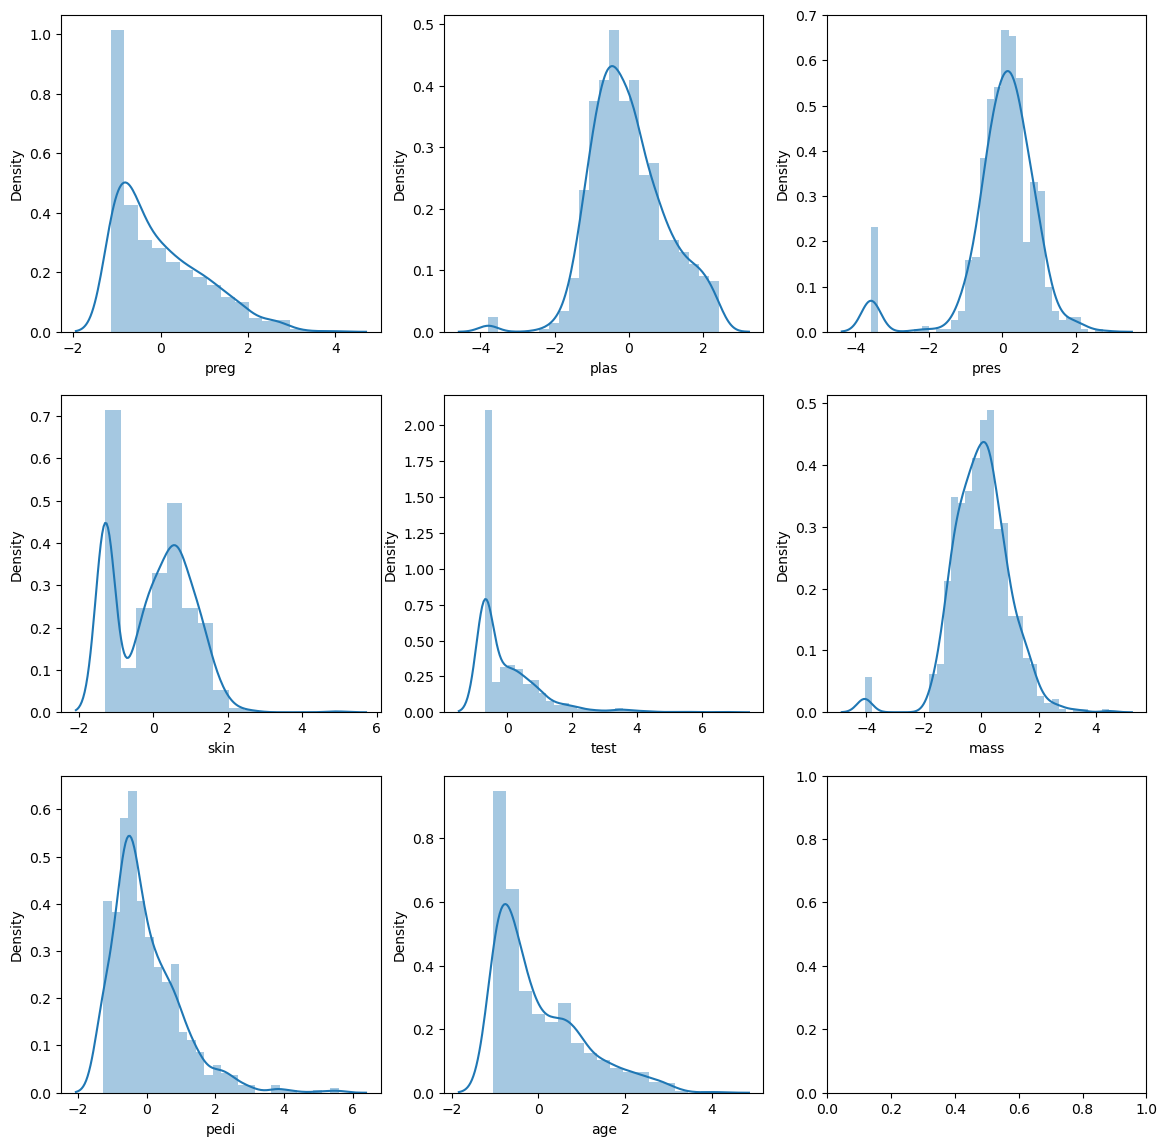

In [6]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(df_standarized["preg"], ax=axes[0, 0])
sns.distplot(df_standarized["plas"], ax=axes[0, 1])
sns.distplot(df_standarized["pres"], ax=axes[0, 2])
sns.distplot(df_standarized["skin"], ax=axes[1, 0])
sns.distplot(df_standarized["test"], ax=axes[1, 1])
sns.distplot(df_standarized["mass"], ax=axes[1, 2])
sns.distplot(df_standarized["pedi"], ax=axes[2, 0])
sns.distplot(df_standarized["age"], ax=axes[2, 1])


<a id="section23"></a>
## <font color="#004D7F"> 2.3. Normalización</font>

Este método de preprocesamiento puede ser útil para conjuntos de datos dispersos (muchos ceros) con atributos de escalas variables cuando se utilizan algoritmos que ponderan valores de entrada como Neural Networks y algoritmos que usan medidas de distancia como k-Nearest Neighbours.

Puede normalizar datos en Python con la clase [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html). Las filas están normalizadas a la longitud $1$

In [9]:
# Normalizo los datos(valor mínimo 0 y máximo 1, en eso se diferencia del escalamiento)
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
print(names)
print(normalizedX[0:5,:])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[0.009 0.227 0.11  0.054 0.    0.052 0.962 0.077]
 [0.003 0.229 0.178 0.078 0.    0.072 0.947 0.084]
 [0.011 0.261 0.091 0.    0.    0.033 0.959 0.046]
 [0.004 0.395 0.293 0.102 0.417 0.125 0.741 0.093]
 [0.    0.06  0.017 0.015 0.073 0.019 0.995 0.014]]


In [10]:
# Convertimos el Numpy Array a dataframe
normalized_df = pd.DataFrame(normalizedX, columns=names[0:8])
normalized_df

,preg,plas,pres,skin,test,mass,pedi,age
0,0.009202,0.226993,0.110429,0.053681,0.000000,0.051534,0.961653,0.076687
1,0.002699,0.229401,0.178123,0.078266,0.000000,0.071789,0.947291,0.083664
2,0.011419,0.261215,0.091354,0.000000,0.000000,0.033259,0.959217,0.045677
3,0.004438,0.395019,0.292935,0.102084,0.417211,0.124719,0.741216,0.093207
4,0.000000,0.059578,0.017395,0.015221,0.073059,0.018743,0.994998,0.014351
...,...,...,...,...,...,...,...,...
763,0.034285,0.346278,0.260565,0.164568,0.617128,0.112797,0.586272,0.215995
764,0.013304,0.811526,0.465629,0.179600,0.000000,0.244788,0.002262,0.179600
765,0.016262,0.393541,0.234173,0.074805,0.364270,0.085213,0.796840,0.097572
766,0.002632,0.331587,0.157899,0.000000,0.000000,0.079212,0.918443,0.123687


C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_6680\1570491830.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_df["preg"], ax=axes[0, 0])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_6680\1570491830.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level f

<Axes: xlabel='age', ylabel='Density'>

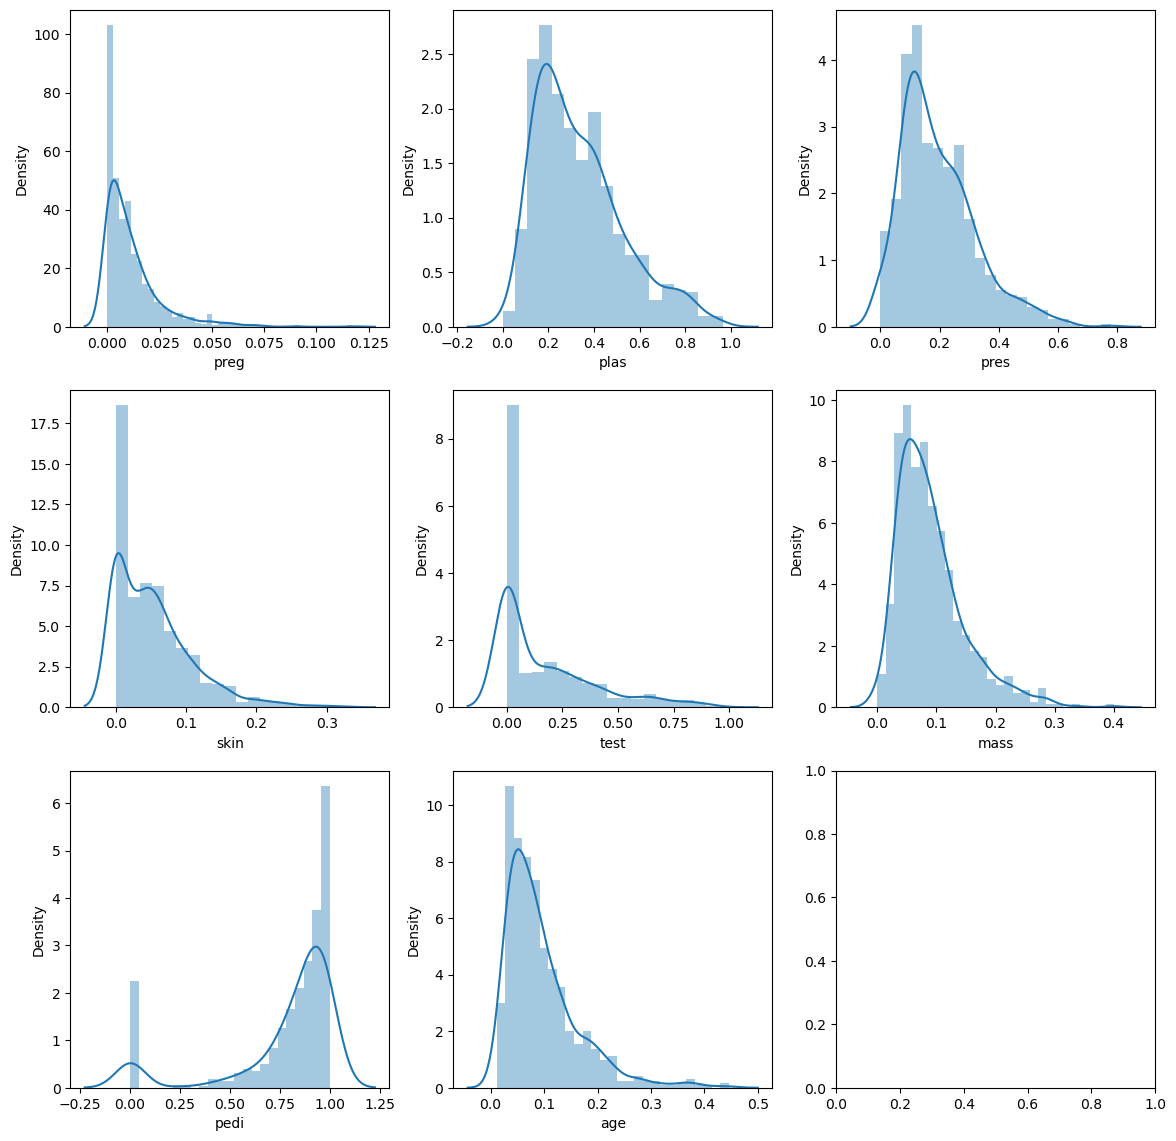

In [11]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(normalized_df["preg"], ax=axes[0, 0])
sns.distplot(normalized_df["plas"], ax=axes[0, 1])
sns.distplot(normalized_df["pres"], ax=axes[0, 2])
sns.distplot(normalized_df["skin"], ax=axes[1, 0])
sns.distplot(normalized_df["test"], ax=axes[1, 1])
sns.distplot(normalized_df["mass"], ax=axes[1, 2])
sns.distplot(normalized_df["pedi"], ax=axes[2, 0])
sns.distplot(normalized_df["age"], ax=axes[2, 1])


<a id="section24"></a>
## <font color="#004D7F"> 2.4. Binarización</font>

Puede crear nuevos atributos binarios en Python usando la clase [Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html). Puede ver que todos los valores iguales o menores que 0 están marcados con 0 y todos los que están por encima de 0 están marcados con 1.

In [13]:
# binarizacion
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X) # ponemos el umbral de 0 (si es menor o igual a 0 se transforman en 0, mayores a 0 en 1 )
binaryX = binarizer.transform(X)
print(names)
print(binaryX[0:5,:])

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [14]:
# Convertimos el Numpy Array a dataframe
binarized_df = pd.DataFrame(binaryX, columns=names[0:8])
binarized_df

,preg,plas,pres,skin,test,mass,pedi,age
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
763,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
764,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
765,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
766,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_6680\2089199894.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(binarized_df["preg"], ax=axes[0, 0])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_6680\2089199894.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fu

<Axes: xlabel='age', ylabel='Density'>

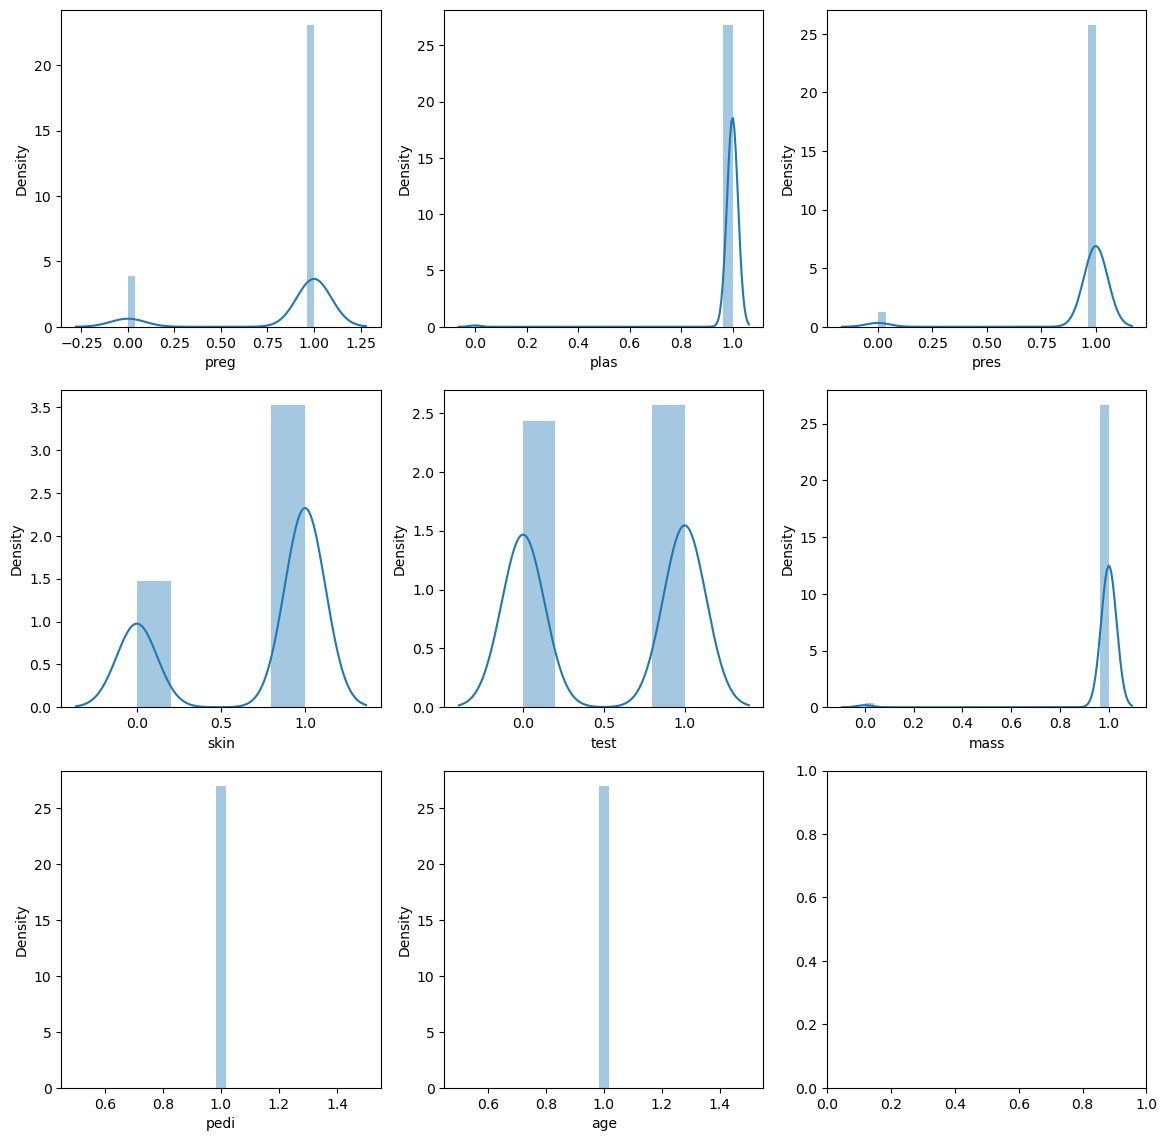

In [15]:
%matplotlib inline
# Univariate Histograms
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(14, 14))
sns.distplot(binarized_df["preg"], ax=axes[0, 0])
sns.distplot(binarized_df["plas"], ax=axes[0, 1])
sns.distplot(binarized_df["pres"], ax=axes[0, 2])
sns.distplot(binarized_df["skin"], ax=axes[1, 0])
sns.distplot(binarized_df["test"], ax=axes[1, 1])
sns.distplot(binarized_df["mass"], ax=axes[1, 2])
sns.distplot(binarized_df["pedi"], ax=axes[2, 0])
sns.distplot(binarized_df["age"], ax=axes[2, 1])


<a id="section25"></a>
## <font color="#004D7F"> 2.5. Box-Cox</font>

En ocasiones los atributos representan el llamado sesgo o inclinación, que es cuando un atributo tiene una distribución similar a la Gaussiana pero esta se encuentra desplazada. Para este tipo de casos, se utiliza la transformación Box-Cox, la cual asume que todos los valores son positivos, que lo que realiza es el sesgo y hacer más Gaussiana la distribución de este atributo. Nótese que aplicamos la transformación sólo a dos atributos que parecen tener un sesgo.

<Figure size 432x288 with 0 Axes>

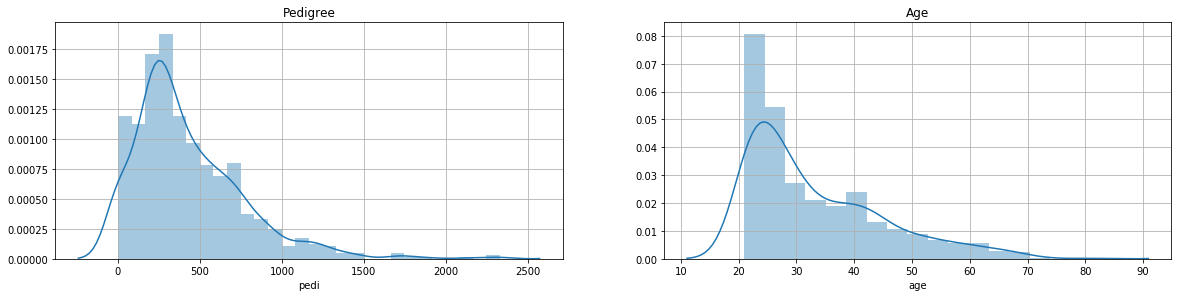

In [12]:
# Univariate Histograms
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(data['pedi'])
plt.title('Pedigree')
plt.grid(True)
plt.subplot(422)
sns.distplot(data['age'])
plt.title('Age')
plt.grid(True)
plt.show()
# Tanto pedi como age tienen sesgo hacia la izquierda

Como vemos, ese sesgo tenemos que corregirlo y para ello utilizaremos la clase [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html). Una vez realizada la transformación podemos ver como se encuentra corregido el sesgo inicial de ambas características.

In [14]:
# Box-Cox Transformación (ni en 'pedi' ni en 'age' tenemos valores negativos)
from sklearn.preprocessing import PowerTransformer
# extraer características con sesgos
features = data[['pedi','age']]

# creo la instancia de transfotmación y aplico fit  
pt = PowerTransformer(method='box-cox',standardize=True) # le aclaro a la instancia que uso el metodo de box-cox y que antes me estandarice los datos
skl_boxcox = pt.fit(features) # hacemos el ajuste previo a la transformación, sobre los datos con sesgos

# veamos los lambdas que encontramos (parámetros intermedios de la función de box-cox)
print (skl_boxcox.lambdas_)
calc_lambdas_bc = skl_boxcox.lambdas_

# transformamos los datos
skl_boxcox = pt.transform(features) # transformo las características, extrayéndoles el sesgo

# pasamos los datos transformados a un nuevo df 
df_features = pd.DataFrame(data=skl_boxcox,columns = ['pedi','age'])
df_features # columnas sin sesgo

# pasamos al df original las columnas transformadas
data.drop (['age'],axis=1,inplace=True) # borramos las columnas originales con sesgo
data.drop (['pedi'],axis=1,inplace=True)

# concatenar ambos dataframes
df_data = pd.concat([data,df_features],axis=1) # axis=1, columnas; axis=0, filas
cols = df_data.columns.tolist() # guardamos las columnas del nuevo df y las transformamos en lista

# Pasa el útimo elemento al primero de la lista (2 veces). Esto lo hacemos para que 'class' siga siendo la última columna (corremos las 2 nuevas adelante)
cols = cols[-1:] + cols [:-1] # se selecciona la última columna y se la concatena a todas las columnas menos la última después 
cols = cols[-1:] + cols [:-1]

# Sobreescribimos
df_data = df_data[cols] # el nuevo df con la configuración de las columnas
df_data

[ 0.46887769 -1.09442343]


,pedi,age,preg,plas,pres,skin,test,mass,class
0,0.717716,1.362797,6,148,72,35,0,33.6,1
1,0.018768,0.127990,1,85,66,29,0,26.6,0
2,0.814658,0.231506,8,183,64,0,0,23.3,1
3,-0.638772,-1.483064,1,89,66,23,94,28.1,0
4,3.167741,0.328461,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-0.621159,1.764261,10,101,76,48,180,32.9,0
764,-2.130657,-0.366775,2,122,70,27,0,36.8,0
765,-0.328074,0.017237,5,121,72,23,112,26.2,0
766,0.012785,1.236934,1,126,60,0,0,30.1,1


<Figure size 432x288 with 0 Axes>

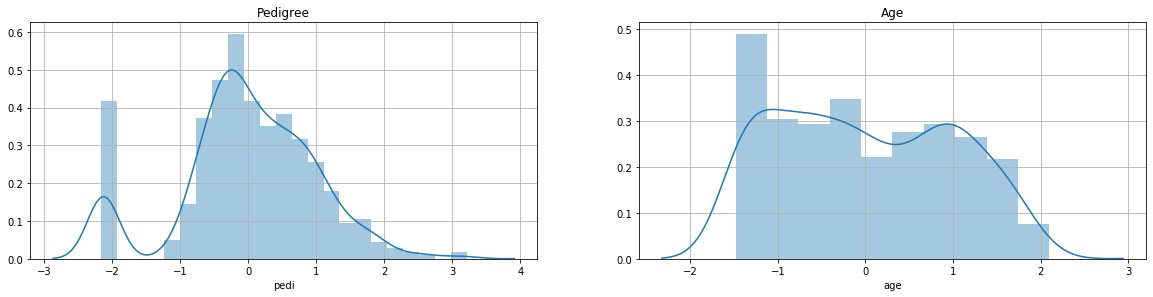

In [17]:
# Vemos si se corrigió el sesgo
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(df_data['pedi'])
plt.title('Pedigree')
plt.grid(True)
plt.subplot(422)
sns.distplot(df_data['age'])
plt.title('Age')
plt.grid(True)
plt.show()

### Yeo Johnson

<a id="section26"></a>
## <font color="#004D7F"> 2.6. Yeo-Johnson</font>

La transformación de Yeo-Johnson es otra transformación de potencia como Box-Cox, pero soporta valores en bruto (sin procesar) que son iguales a cero y negativos. Para utilizar esta transformación únicamente tenemos que poner en la propiedad `method` de la clase `PowerTransformer` el valor `yeo-johnson` o directamente no poner `method` ya que por defecto utiliza esta transoformación.

In [16]:
# Yeo-Johnson Transformación (si 'pedi' o 'age' tuvieran valores negativos tendríamos que usar este)
from sklearn.preprocessing import PowerTransformer
# extraer características con sesgos
features = data[['pedi','age']]

# creo la instancia de transfotmación y aplico fit  
pt = PowerTransformer(method='yeo-johnson',standardize=True) # le aclaro a la instancia que uso el metodo de yeo-johnson y que antes me estandarice los datos
skl_boxcox = pt.fit(features) # hacemos el ajuste previo a la transformación, sobre los datos con sesgos

# veamos los lambdas que encontramos (parámetros intermedios de la función de box-cox)
print (skl_boxcox.lambdas_)
calc_lambdas_yo = skl_boxcox.lambdas_

# transformamos los datos
skl_boxcox = pt.transform(features) # transformo las características, extrayéndoles el sesgo

# pasamos los datos transformados a un nuevo df 
df_features = pd.DataFrame(data=skl_boxcox,columns = ['pedi','age'])
df_features # columnas sin sesgo

# pasamos al df original las columnas transformadas
data.drop (['age'],axis=1,inplace=True) # borramos las columnas originales con sesgo
data.drop (['pedi'],axis=1,inplace=True)

# concatenar ambos dataframes
df_data = pd.concat([data,df_features],axis=1) # axis=1, columnas; axis=0, filas
cols = df_data.columns.tolist() # guardamos las columnas del nuevo df y las transformamos en lista

# Pasa el útimo elemento al primero de la lista (2 veces). Esto lo hacemos para que 'class' siga siendo la última columna (corremos las 2 nuevas adelante)
cols = cols[-1:] + cols [:-1] # se selecciona la última columna y se la concatena a todas las columnas menos la última después 
cols = cols[-1:] + cols [:-1]

# Sobreescribimos
df_data = df_data[cols] # el nuevo df con la configuración de las columnas
df_data

,pedi,age,preg,plas,pres,skin,test,mass,class
0,0.720862,1.364180,6,148,72,35,0,33.6,1
1,0.005392,0.126452,1,85,66,29,0,26.6,0
2,0.820468,0.230161,8,183,64,0,0,23.3,1
3,-0.662166,-1.480075,1,89,66,23,94,28.1,0
4,3.258044,0.327328,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...,...,...
763,-0.644375,1.765331,10,101,76,48,180,32.9,0
764,-2.074512,-0.368619,2,122,70,27,0,36.8,0
765,-0.347546,0.015535,5,121,72,23,112,26.2,0
766,-0.000709,1.238144,1,126,60,0,0,30.1,1


C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_3360\1924244901.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['pedi'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Maxi Mores\AppData\Local\Temp\ipykernel_3360\1924244901.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar

<Figure size 640x480 with 0 Axes>

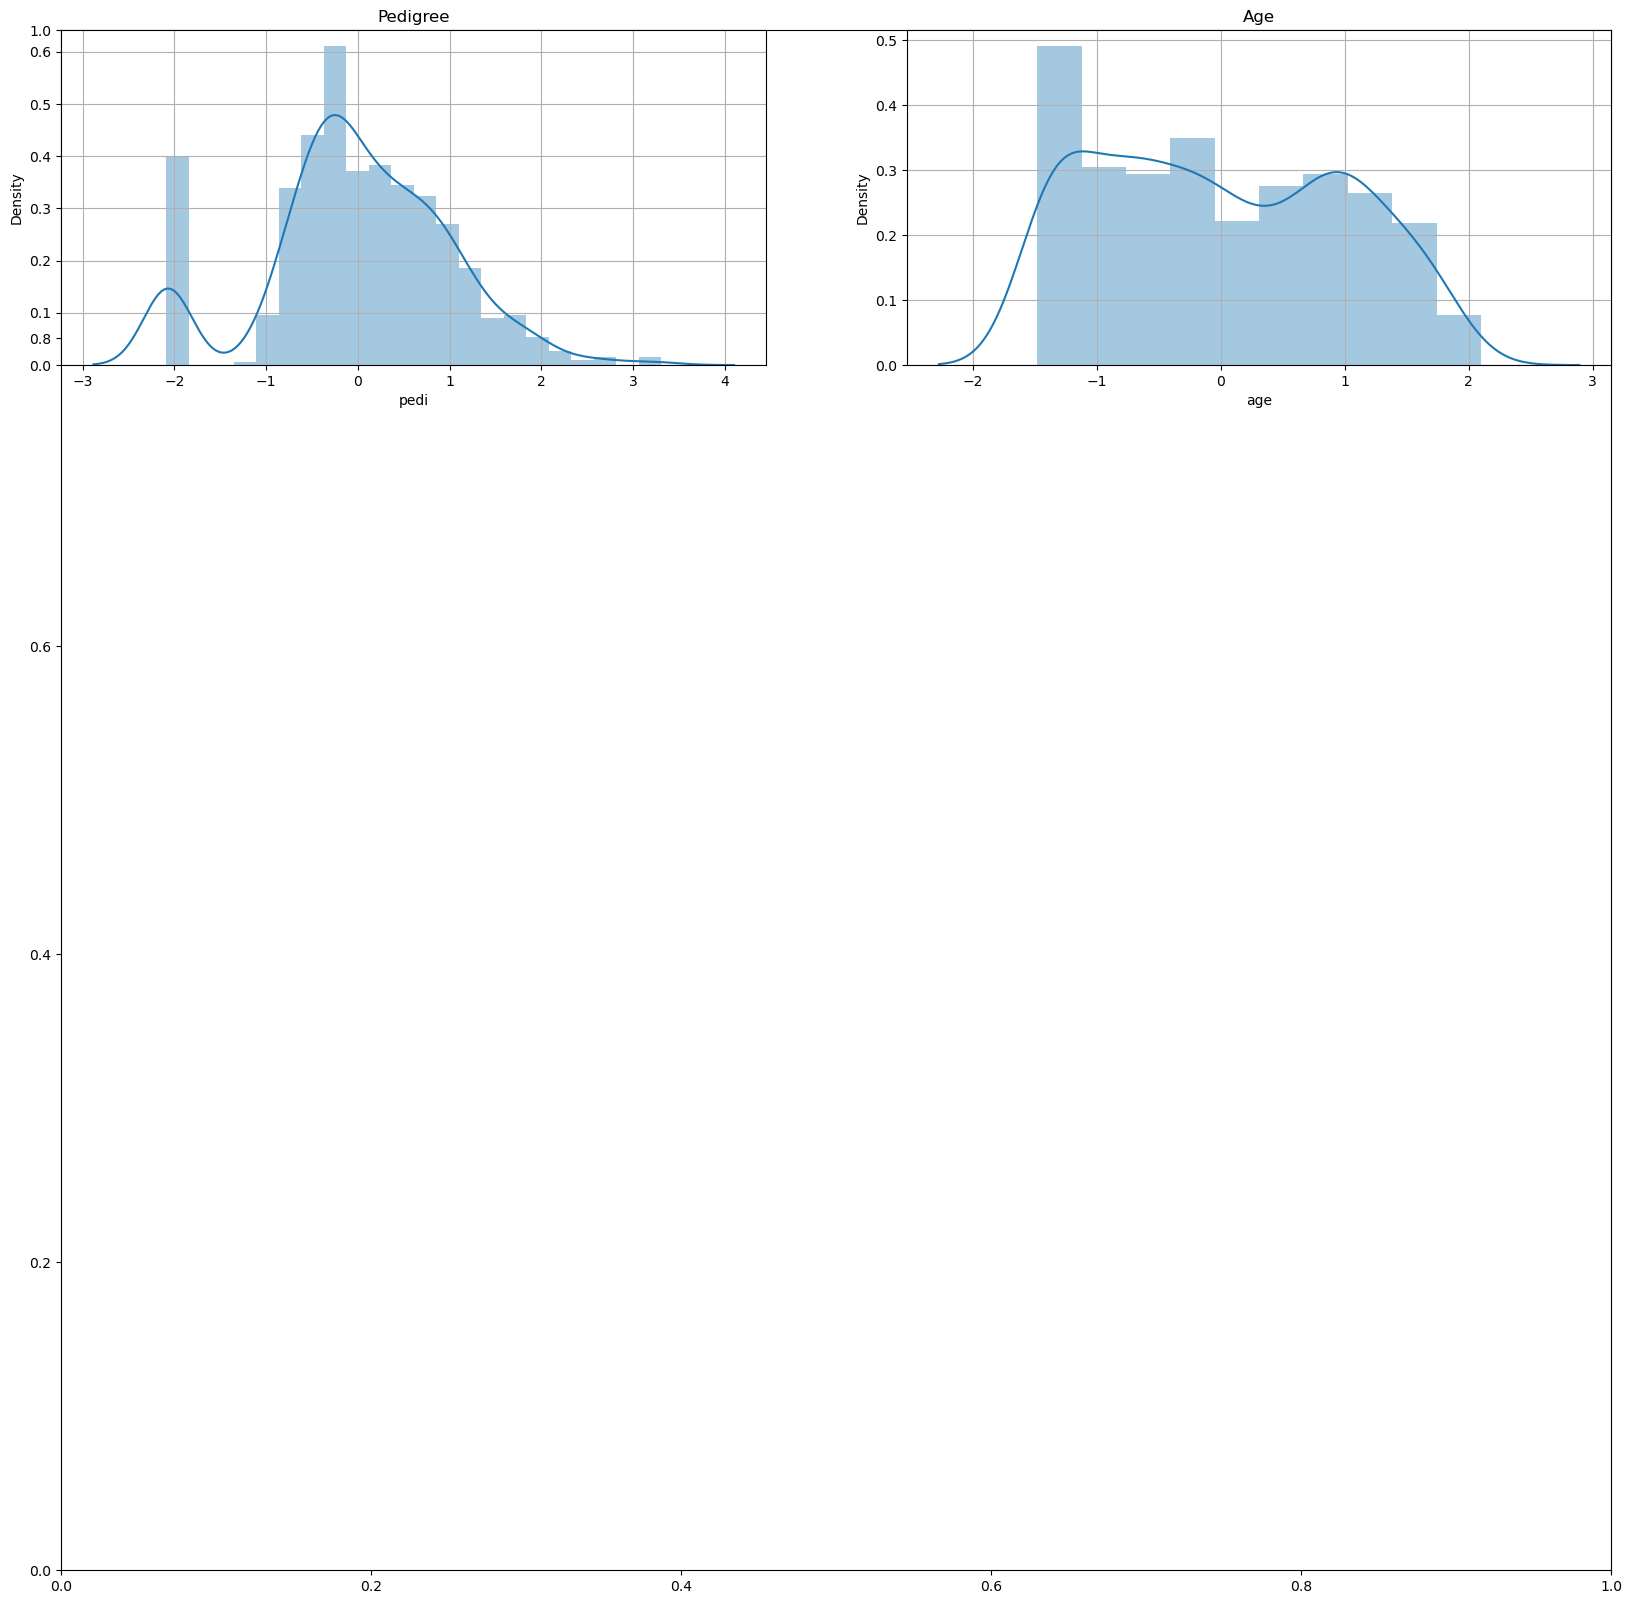

In [10]:
%matplotlib inline
# Univariate Histograms
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)
sns.distplot(df_data['pedi'])
plt.title('Pedigree')
plt.grid(True)
plt.subplot(422)
sns.distplot(df_data['age'])
plt.title('Age')
plt.grid(True)
plt.show()
# Lo mismo que Cox-Box

<a id="section26"></a>
### <font color="#004D7F"> Coeficiente Box-Cox y Yeo-Johnson</font>

Estas transforamciones surgen ya que en determinadas ocasionas se utilizan una transformación logarítmica o de raíz cuadrada a los datos pero sin saber muy bien cual de los dos tendrá una mejor incidencia. Estas dos transformaciones realizan ese análisis y establece la mejor transforamción para sus datos. 

Podemos usar una versión generalizada de la transformación que encuentre un parámetro (lambda) que mejor transforme una variable en una distribución de probabilidad gaussiana (si logarítmica o raíz cuadrada, por ejemplo). Hay dos enfoques populares para tales transformaciones automáticas de energía; son:

Si nos hemos fijado `PowerTransform` tiene una propiedad llamada `lambdas_`, a menudo denominado lambda, se usa para controlar la naturaleza de la transformación. A continuación se presentan algunos valores comunes para _lambda:_

- Se indica básicamente a que exponente se elevan los datos
 * _lambda = -1_ es una transformación recíproca (se toma el recíproco de los datos)
 * _lambda = -0.5_ es una transformación de raíz cuadrada recíproca.
 * _lambda = 0.0_ es una transformación logarítmica (se eleva a log natural).
 * _lambda = 0.5_ es una transformación de raíz cuadrada.
 * _lambda = 1.0_ no es una transformación (se eleva a la 1, Identidad).
 * _lambda = 2.0_ cuadrática.
 * _0 < lambda < 1_ potencias fraccionales
 * _lambda < 0_ recíprocas de potencia

Veamos el coeficiente de de las dos variables son:

In [17]:
print(f"Lambda de Box-Cox: {calc_lambdas_bc}")
print(f"Lambda de Yeo-Johnson: {calc_lambdas_yo}")

Lambda de Box-Cox: [ 0.46887769 -1.09442343]
Lambda de Yeo-Johnson: [ 0.47991001 -1.14960183]


Podemos observar que a la primera variable le ha realizado una raíz cudrada recíproca y a la segunda una transforamción recíproca.

## Para aplicar Yeo-Johnson sobre datos normalizados, extraer del df_normalized la Xnorm y luego aplicar esos valores a la transformación de Yeo-Johnson (lo mismo para cualquier otra combinación de métodos)

## Una vez que expire Distplot, reemplazarlo por histplot (kde=True,stat='density')

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>